In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

print("libraries loaded!")

All libraries loaded successfully!


In [ ]:
# Load the vehicle maintenance dataset
df = pd.read_csv("/content/vehicle_dataset.csv", on_bad_lines='skip', engine='python')

# First look at the data
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape: (50000, 20)

Columns: ['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues', 'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size', 'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date', 'Owner_Type', 'Insurance_Premium', 'Service_History', 'Accident_History', 'Fuel_Efficiency', 'Tire_Condition', 'Brake_Condition', 'Battery_Status', 'Need_Maintenance']


,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


In [ ]:
# Check missing values, target distribution and data types
print("Missing Values:")
print(df.isnull().sum())

print("\nTarget Column Distribution:")
print(df['Need_Maintenance'].value_counts())

print("\nData Types:")
print(df.dtypes)

Missing Values:
Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64

Target Column Distribution:
Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64

Data Types:
Vehicle_Model            object
Mileage                   int64
Maintenance_History      object
Reported_Issues           int64
Vehicle_Age               int64
Fuel_Type                object
Transmission_Type        object
Engine_Size               int64
Odometer_Reading          int64
Last_Service_Date        object
Warranty_Expiry_Date    

In [ ]:
# Drop date columns as they are not useful for ML directly
df = df.drop(columns=['Last_Service_Date', 'Warranty_Expiry_Date'])

# Encode all text columns into numbers
categorical_columns = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type',
                       'Transmission_Type', 'Owner_Type', 'Tire_Condition',
                       'Brake_Condition', 'Battery_Status']

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print("Shape after preprocessing:", df.shape)
print("\nAll data types now:")
print(df.dtypes)
df.head()

Shape after preprocessing: (50000, 18)

All data types now:
Vehicle_Model            int64
Mileage                  int64
Maintenance_History      int64
Reported_Issues          int64
Vehicle_Age              int64
Fuel_Type                int64
Transmission_Type        int64
Engine_Size              int64
Odometer_Reading         int64
Owner_Type               int64
Insurance_Premium        int64
Service_History          int64
Accident_History         int64
Fuel_Efficiency        float64
Tire_Condition           int64
Brake_Condition          int64
Battery_Status           int64
Need_Maintenance         int64
dtype: object


,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,4,58765,1,0,4,1,0,2000,28524,1,20782,6,3,13.622204,1,1,2,1
1,5,60353,0,1,7,1,0,2500,133630,1,23489,7,0,13.625307,1,1,2,1
2,0,68072,2,0,2,1,0,1500,34022,0,17979,7,0,14.306302,1,0,2,1
3,0,60849,0,4,5,2,0,2500,81636,1,6220,7,3,18.709467,1,2,1,1
4,0,45742,2,5,1,2,1,2000,97162,2,16446,6,2,16.977482,0,0,2,1


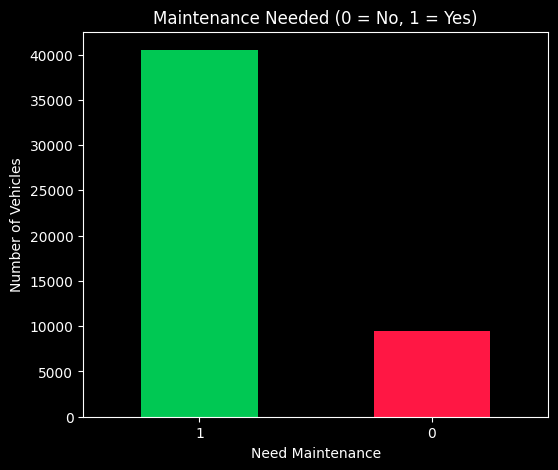

Observation: Out of 50,000 vehicles, 40,498 need maintenance (81%) and only 9,502 don't (19%). This class imbalance means our model will naturally lean towards predicting maintenance needed, which we will handle during model training.


In [ ]:
# Chart 1 - Maintenance distribution with dark theme
plt.style.use('dark_background')
plt.figure(figsize=(6, 5))
df['Need_Maintenance'].value_counts().plot(kind='bar', color=['#00C853', '#FF1744'])
plt.title('Maintenance Needed (0 = No, 1 = Yes)', color='white')
plt.xlabel('Need Maintenance', color='white')
plt.ylabel('Number of Vehicles', color='white')
plt.xticks(rotation=0)
plt.show()

print("Observation: Out of 50,000 vehicles, 40,498 need maintenance (81%) and only 9,502 don't (19%). This class imbalance means our model will naturally lean towards predicting maintenance needed, which we will handle during model training.")

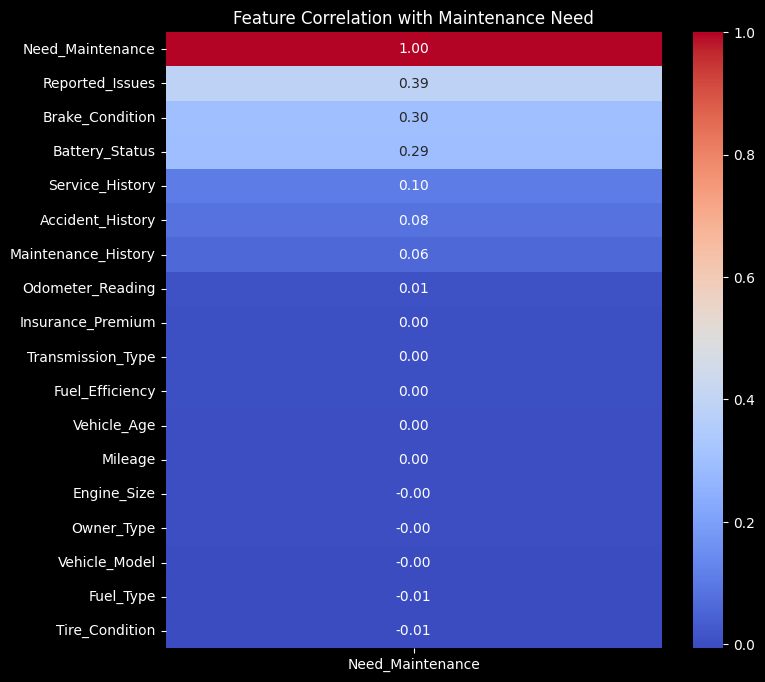

Observation: Reported_Issues (0.39), Brake_Condition (0.30) and Battery_Status (0.29) are the strongest predictors of maintenance need. Features like Mileage, Vehicle_Age, Fuel_Type and Engine_Size show near zero correlation (0.00) meaning they have almost no influence on whether a vehicle needs maintenance in this dataset.


In [ ]:
# Chart - Which features are most correlated with maintenance need?
plt.figure(figsize=(8, 8))
corr = df.corr()
sns.heatmap(corr[['Need_Maintenance']].sort_values('Need_Maintenance', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Maintenance Need')
plt.show()

print("Observation: Reported_Issues (0.39), Brake_Condition (0.30) and Battery_Status (0.29) are the strongest predictors of maintenance need. Features like Mileage, Vehicle_Age, Fuel_Type and Engine_Size show near zero correlation (0.00) meaning they have almost no influence on whether a vehicle needs maintenance in this dataset.")

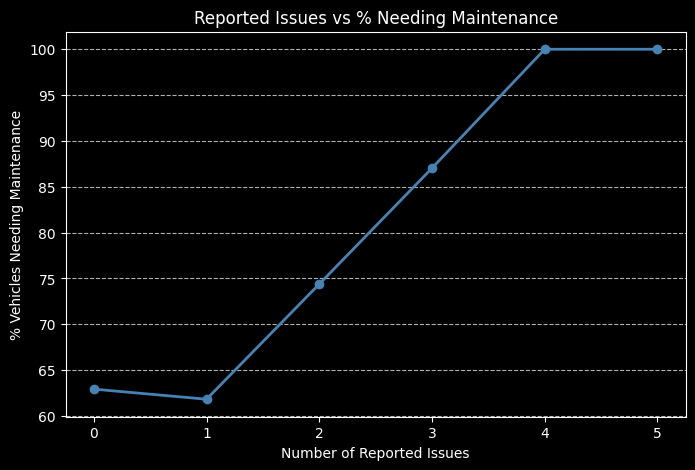

Observation: There is a clear upward trend — vehicles with 0 or 1 reported issues have around 62% maintenance need, while vehicles with 4 or 5 reported issues reach 100% maintenance need. This confirms that Reported_Issues is the single strongest predictor of vehicle maintenance requirement.


In [ ]:
# Chart 3 - Do more reported issues mean more maintenance needed?

plt.figure(figsize=(8, 5))
df.groupby('Reported_Issues')['Need_Maintenance'].mean().mul(100).plot(kind='line',
                                                                        marker='o',
                                                                        color='steelblue',
                                                                        linewidth=2,
                                                                        markersize=6)
plt.title('Reported Issues vs % Needing Maintenance')
plt.xlabel('Number of Reported Issues')
plt.ylabel('% Vehicles Needing Maintenance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Observation: There is a clear upward trend — vehicles with 0 or 1 reported issues have around 62% maintenance need, while vehicles with 4 or 5 reported issues reach 100% maintenance need. This confirms that Reported_Issues is the single strongest predictor of vehicle maintenance requirement.")

In [ ]:
# Process Flow: All Columns → Keep Useful → Drop Useless

# Based on our correlation heatmap, we keep only
# features with meaningful correlation to Need_Maintenance

useful_features = ['Reported_Issues', 'Brake_Condition',
                   'Battery_Status', 'Service_History',
                   'Accident_History', 'Maintenance_History']

# X = input features (what the model learns from)
X = df[useful_features]

# Y = target column (what the model predicts)
y = df['Need_Maintenance']

print("Input features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures we are using:", useful_features)

Input features shape: (50000, 6)
Target shape: (50000,)

Features we are using: ['Reported_Issues', 'Brake_Condition', 'Battery_Status', 'Service_History', 'Accident_History', 'Maintenance_History']


In [ ]:

# PHASE 4: TRAIN TEST SPLIT
# Process Flow: Full Data → 80% Train + 20% Test


# Split data into training and testing sets
# test_size=0.2 means 20% goes to testing, 80% to training
# random_state=42 ensures we get the same split every time we run
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2,
                                                     random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nTraining target size:", y_train.shape)
print("Testing target size:", y_test.shape)


Training set size: (40000, 6)
Testing set size: (10000, 6)

Training target size: (40000,)
Testing target size: (10000,)


In [ ]:

# PHASE 5: BUILDING THE PIPELINE & TRAINING
# Process Flow: Raw Data → Scale → Train Model


# Pipeline 1 - Logistic Regression
# StandardScaler scales all numbers to same range
# LogisticRegression is our first ML model
pipeline_lr = Pipeline([
    ('scaler',StandardScaler()),        # Step 1: scale the data
    ('model', LogisticRegression())      # Step 2: train logistic regression
])

# Pipeline 2 - Decision Tree
# Decision Tree doesn't need scaling but we keep it consistent
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),        # Step 1: scale the data
    ('model', DecisionTreeClassifier())  # Step 2: train decision tree
])

# Train both models on training data
pipeline_lr.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)

print("Logistic Regression Pipeline trained successfully!")
print("Decision Tree Pipeline trained successfully!")

Logistic Regression Pipeline trained successfully!
Decision Tree Pipeline trained successfully!


In [ ]:

# PHASE 6: MODEL EVALUATION
# Process Flow: Test Data → Predict → Measure Accuracy


# Make predictions on test data using both models
y_pred_lr = pipeline_lr.predict(X_test)   # Logistic Regression predictions
y_pred_dt = pipeline_dt.predict(X_test)   # Decision Tree predictions

# ---- Logistic Regression Results ----

print("LOGISTIC REGRESSION RESULTS")

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# ---- Decision Tree Results ----

print("DECISION TREE RESULTS")

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

LOGISTIC REGRESSION RESULTS
Accuracy: 0.8877

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1915
           1       0.91      0.95      0.93      8085

    accuracy                           0.89     10000
   macro avg       0.83      0.78      0.80     10000
weighted avg       0.88      0.89      0.88     10000

DECISION TREE RESULTS
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:

# FIXING DECISION TREE OVERFITTING
# Adding max_depth to prevent memorization


pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(max_depth=5, random_state=42))  # limit tree depth
])

# Retrain with fixed decision tree
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)


print("DECISION TREE RESULTS (Fixed)")

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

DECISION TREE RESULTS (Fixed)
Accuracy: 0.9638

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1915
           1       1.00      0.96      0.98      8085

    accuracy                           0.96     10000
   macro avg       0.92      0.98      0.95     10000
weighted avg       0.97      0.96      0.96     10000



In [ ]:

# PHASE 7: SAVING THE MODELS
# Process Flow: Trained Model → Joblib → .pkl file


import joblib

# Save Logistic Regression pipeline
joblib.dump(pipeline_lr, 'model_lr.pkl')

# Save Decision Tree pipeline
joblib.dump(pipeline_dt, 'model_dt.pkl')

print("Logistic Regression model saved as model_lr.pkl")
print("Decision Tree model saved as model_dt.pkl")

Logistic Regression model saved as model_lr.pkl
Decision Tree model saved as model_dt.pkl


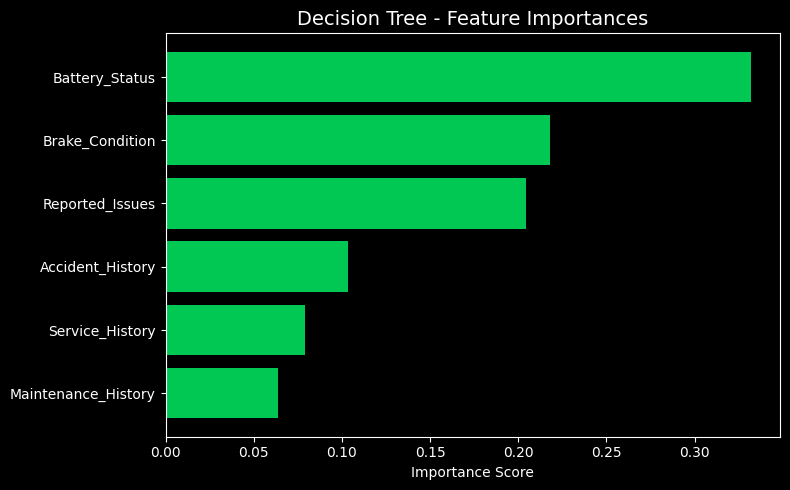


Feature Importance Rankings:
  Battery_Status: 0.3318
  Brake_Condition: 0.2178
  Reported_Issues: 0.2046
  Accident_History: 0.1033
  Service_History: 0.0788
  Maintenance_History: 0.0637


In [ ]:
# PHASE 8: FEATURE IMPORTANCE
# Which features does the Decision Tree rely on most?

import matplotlib.pyplot as plt
import numpy as np

# Extract the trained Decision Tree from inside the pipeline
dt_model = pipeline_dt.named_steps['model']  # ← this is the fix

feature_names = X.columns.tolist()
importances = dt_model.feature_importances_

# Sort by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(sorted_features[::-1], sorted_importances[::-1], color='#00C853')
ax.set_xlabel('Importance Score', color='white')
ax.set_title('Decision Tree - Feature Importances', color='white', fontsize=14)
ax.tick_params(colors='white')
plt.tight_layout()
plt.show()

# Print values too
print("\nFeature Importance Rankings:")
for f, i in zip(sorted_features, sorted_importances):
    print(f"  {f}: {i:.4f}")

Metric        Logistic Regression   Decision Tree
──────────────────────────────────────────────────
Accuracy                   0.8877          0.9638
Precision                  0.9118          1.0000
Recall                     0.9534          0.9552
F1 Score                   0.9321          0.9771


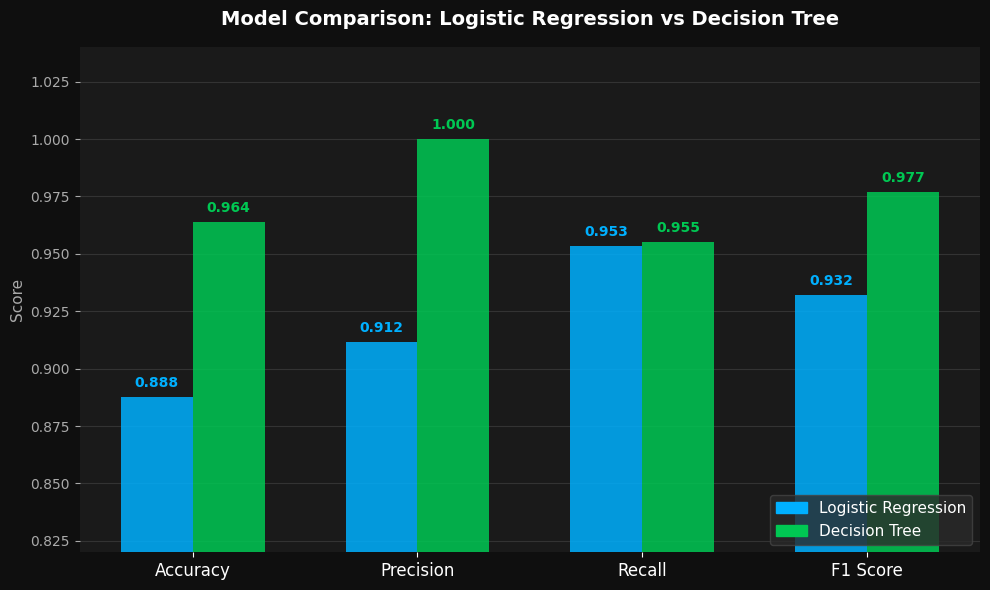

In [ ]:
# PHASE 8: MODEL COMPARISON
# Side-by-side comparison of both models


# ── Metrics ──────────────────────────────────────────────────────────────────
lr_scores = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr),
]
dt_scores = [
    accuracy_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_dt),
]

labels    = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x         = np.arange(len(labels))
width     = 0.32
LR_COLOR  = '#00B0FF'
DT_COLOR  = '#00C853'

# ── Print Table ───────────────────────────────────────────────────────────────
print(f"{'Metric':<12} {'Logistic Regression':>20} {'Decision Tree':>15}")
print("─" * 50)
for label, lr, dt in zip(labels, lr_scores, dt_scores):
    print(f"{label:<12} {lr:>20.4f} {dt:>15.4f}")

# ── Plot ──────────────────────────────────────────────────────────────────────
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#0f0f0f')
ax.set_facecolor('#1a1a1a')

bars1 = ax.bar(x - width/2, lr_scores, width, color=LR_COLOR, alpha=0.85, zorder=3)
bars2 = ax.bar(x + width/2, dt_scores, width, color=DT_COLOR, alpha=0.85, zorder=3)

# Subtle grid lines
ax.yaxis.grid(True, color='#333333', linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

# Value labels on bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.003,
            f'{bar.get_height():.3f}', ha='center', va='bottom',
            color=LR_COLOR, fontsize=10, fontweight='bold')

for bar in bars2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.003,
            f'{bar.get_height():.3f}', ha='center', va='bottom',
            color=DT_COLOR, fontsize=10, fontweight='bold')

# Axes styling
ax.set_ylim(0.82, 1.04)
ax.set_xticks(x)
ax.set_xticklabels(labels, color='white', fontsize=12)
ax.set_ylabel('Score', color='#aaaaaa', fontsize=11)
ax.set_title('Model Comparison: Logistic Regression vs Decision Tree',
             color='white', fontsize=14, fontweight='bold', pad=16)
ax.tick_params(axis='y', colors='#aaaaaa')
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Legend
legend = ax.legend(
    handles=[
        mpatches.Patch(color=LR_COLOR, label='Logistic Regression'),
        mpatches.Patch(color=DT_COLOR, label='Decision Tree'),
    ],
    facecolor='#2a2a2a', edgecolor='#444444',
    labelcolor='white', fontsize=11, loc='lower right'
)

plt.tight_layout()
plt.show()

In [ ]:
# PHASE 9: INFERENCE ON NEW DATA
# Testing saved models with sample input


import joblib
import pandas as pd

# Load saved models
pipeline_lr = joblib.load('model_lr.pkl')
pipeline_dt = joblib.load('model_dt.pkl')

# Sample user input (simulating a real vehicle record)
sample_input = {
    'Reported_Issues':    1,   # maximum issues
    'Brake_Condition':    2,   # critical
    'Battery_Status':     2,   # dead
    'Service_History':    0,   # no service
    'Accident_History':   1,   # has accidents
    'Maintenance_History':0    # no maintenance
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# ── Predictions ──────────────────────────────────────────────────
lr_result = pipeline_lr.predict(sample_df)[0]
dt_result = pipeline_dt.predict(sample_df)[0]

label = {0: "No Maintenance Needed", 1: "Maintenance Needed"}

print("        PREDICTION RESULTS")
print(f"  Logistic Regression : {label[lr_result]}")
print(f"  Decision Tree       : {label[dt_result]}")

        PREDICTION RESULTS
  Logistic Regression : Maintenance Needed
  Decision Tree       : Maintenance Needed


In [ ]:
print("hello")